In [112]:
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines import WeibullAFTFitter
from lifelines import LogLogisticAFTFitter
from lifelines import LogNormalAFTFitter
from lifelines import GeneralizedGammaRegressionFitter
from lifelines import AalenAdditiveFitter
from lifelines.statistics import proportional_hazard_test
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import os

In [4]:
df = load_waltons()
print(df.head())
T = df['T']
E = df['E']

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

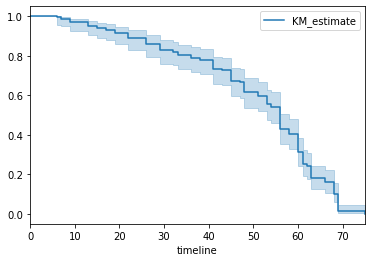

In [6]:
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

In [108]:
df.head(10)

,trialNum,censorFlag,withheldT,outcome1,outcome2,outcome3,outcome4,outcome5,withheldT1,withheldT2,withheldT3,withheldT4,withheldT5,lickFree
0,6,1,2.122,-1,-1,-1,-1,-1,3.100,3.843,3.975,0.931,0.511,11
1,7,1,5.301,-1,-1,-1,-1,-1,2.122,3.100,3.843,3.975,0.931,1
2,8,1,0.890,-1,-1,-1,-1,-1,5.301,2.122,3.100,3.843,3.975,3
3,9,0,8.755,-1,-1,-1,-1,-1,0.890,5.301,2.122,3.100,3.843,0
4,10,1,0.052,1,-1,-1,-1,-1,8.755,0.890,5.301,2.122,3.100,1
5,11,1,3.185,-1,1,-1,-1,-1,0.052,8.755,0.890,5.301,2.122,4
6,12,1,1.903,-1,-1,1,-1,-1,3.185,0.052,8.755,0.890,5.301,0
7,13,0,5.882,-1,-1,-1,1,-1,1.903,3.185,0.052,8.755,0.890,0
8,14,0,5.513,1,-1,-1,-1,1,5.882,1.903,3.185,0.052,8.755,2
9,15,0,8.778,1,1,-1,-1,-1,5.513,5.882,1.903,3.185,0.052,1


<lifelines.CoxPHFitter: fitted with 112 total observations, 56 right-censored observations>
             duration col = 'withheldT'
                event col = 'censorFlag'
      baseline estimation = breslow
   number of observations = 112
number of events observed = 56
   partial log-likelihood = -241.86
         time fit was run = 2024-07-24 03:08:33 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
outcome1     0.14       1.15       0.18            -0.21             0.48                 0.81                 1.62
outcome2     0.02       1.02       0.20            -0.37             0.41                 0.69                 1.51
outcome3     0.12       1.13       0.19            -0.25             0.49                 0.78                 1.63
outcome4    -0.08       0.92       0.18            -0.44             0.27                 0.65                 1.31
outcome5     0.36       1.43       0.20            -0.03             0.74                 0.98                 2.10
withheldT1   0.00       1.00       0.07            -0.13             0.14                 0.88                 1.15
withheldT2  -0.10       0.90       0.07            -0.24             0.04                 0.78                 1.04
withheldT3  -0.02       0.98       0.07            -0.15             0.11                 0.86                 1.12
withheldT4   0.10       1.11       0.07            -0.03             0.23                 0.97                 1.26
withheldT5  -0.07       0.93       0.07            -0.22             0.07                 0.81                 1.07

               z    p   -log2(p)
covariate                       
outcome1    0.77 0.44       1.18
outcome2    0.11 0.91       0.13
outcome3    0.63 0.53       0.93
outcome4   -0.46 0.65       0.63
outcome5    1.83 0.07       3.90
withheldT1  0.07 0.94       0.08
withheldT2 -1.39 0.16       2.60
withheldT3 -0.26 0.79       0.34
withheldT4  1.56 0.12       3.06
withheldT5 -1.03 0.30       1.73
---
Concordance = 0.61
Partial AIC = 503.72
log-likelihood ratio test = 11.08 on 10 df
-log2(p) of ll-ratio test = 1.51

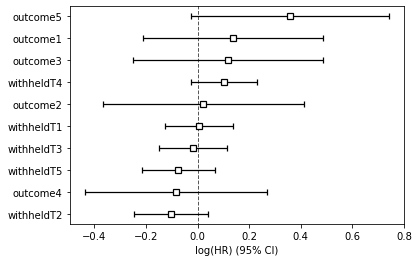

In [114]:
df = pd.read_csv(r'M:\My Drive\Response Inhibition Project\2021-22_Attention\NP 2024-7\cox hazard cov\covMatrix_N3_2024_03_03.csv')
cph = CoxPHFitter()
cph.fit(df[:], duration_col='withheldT', event_col='censorFlag', formula="outcome1 + outcome2 + outcome3 + outcome4 + outcome5 + withheldT1 + withheldT2 + withheldT3 + withheldT4 + withheldT5")
cph.print_summary()
cph.plot()

In [103]:
results = proportional_hazard_test(cph, df, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 98 total observations, 62 right-censored observations>
         test_name = proportional_hazard_test

---
          test_statistic    p  -log2(p)
outcome1            0.79 0.37      1.42
outcome2            0.00 0.98      0.03
outcome3            0.44 0.51      0.98
outcome4            0.19 0.66      0.59
outcome5            1.11 0.29      1.77

In [83]:
mat_data = scipy.io.loadmat(r'M:\My Drive\Response Inhibition Project\2021-22_Attention\NP 2024-7\subjIDX.mat')
# Extract the 'subjIDX' from the loaded .mat data
subjIDX = mat_data['subjIDX']

# Create a dictionary to hold the animal names and their indices
animal_dict = {}

# Iterate over the cell array and populate the dictionary
for i, indices in enumerate(subjIDX[0]):
    animal_name = f'N{i+1}'
    # Convert MATLAB indices to Python indices (MATLAB uses 1-based indexing)
    animal_indices = indices[0].tolist() if indices.size else []
    animal_dict[animal_name] = animal_indices

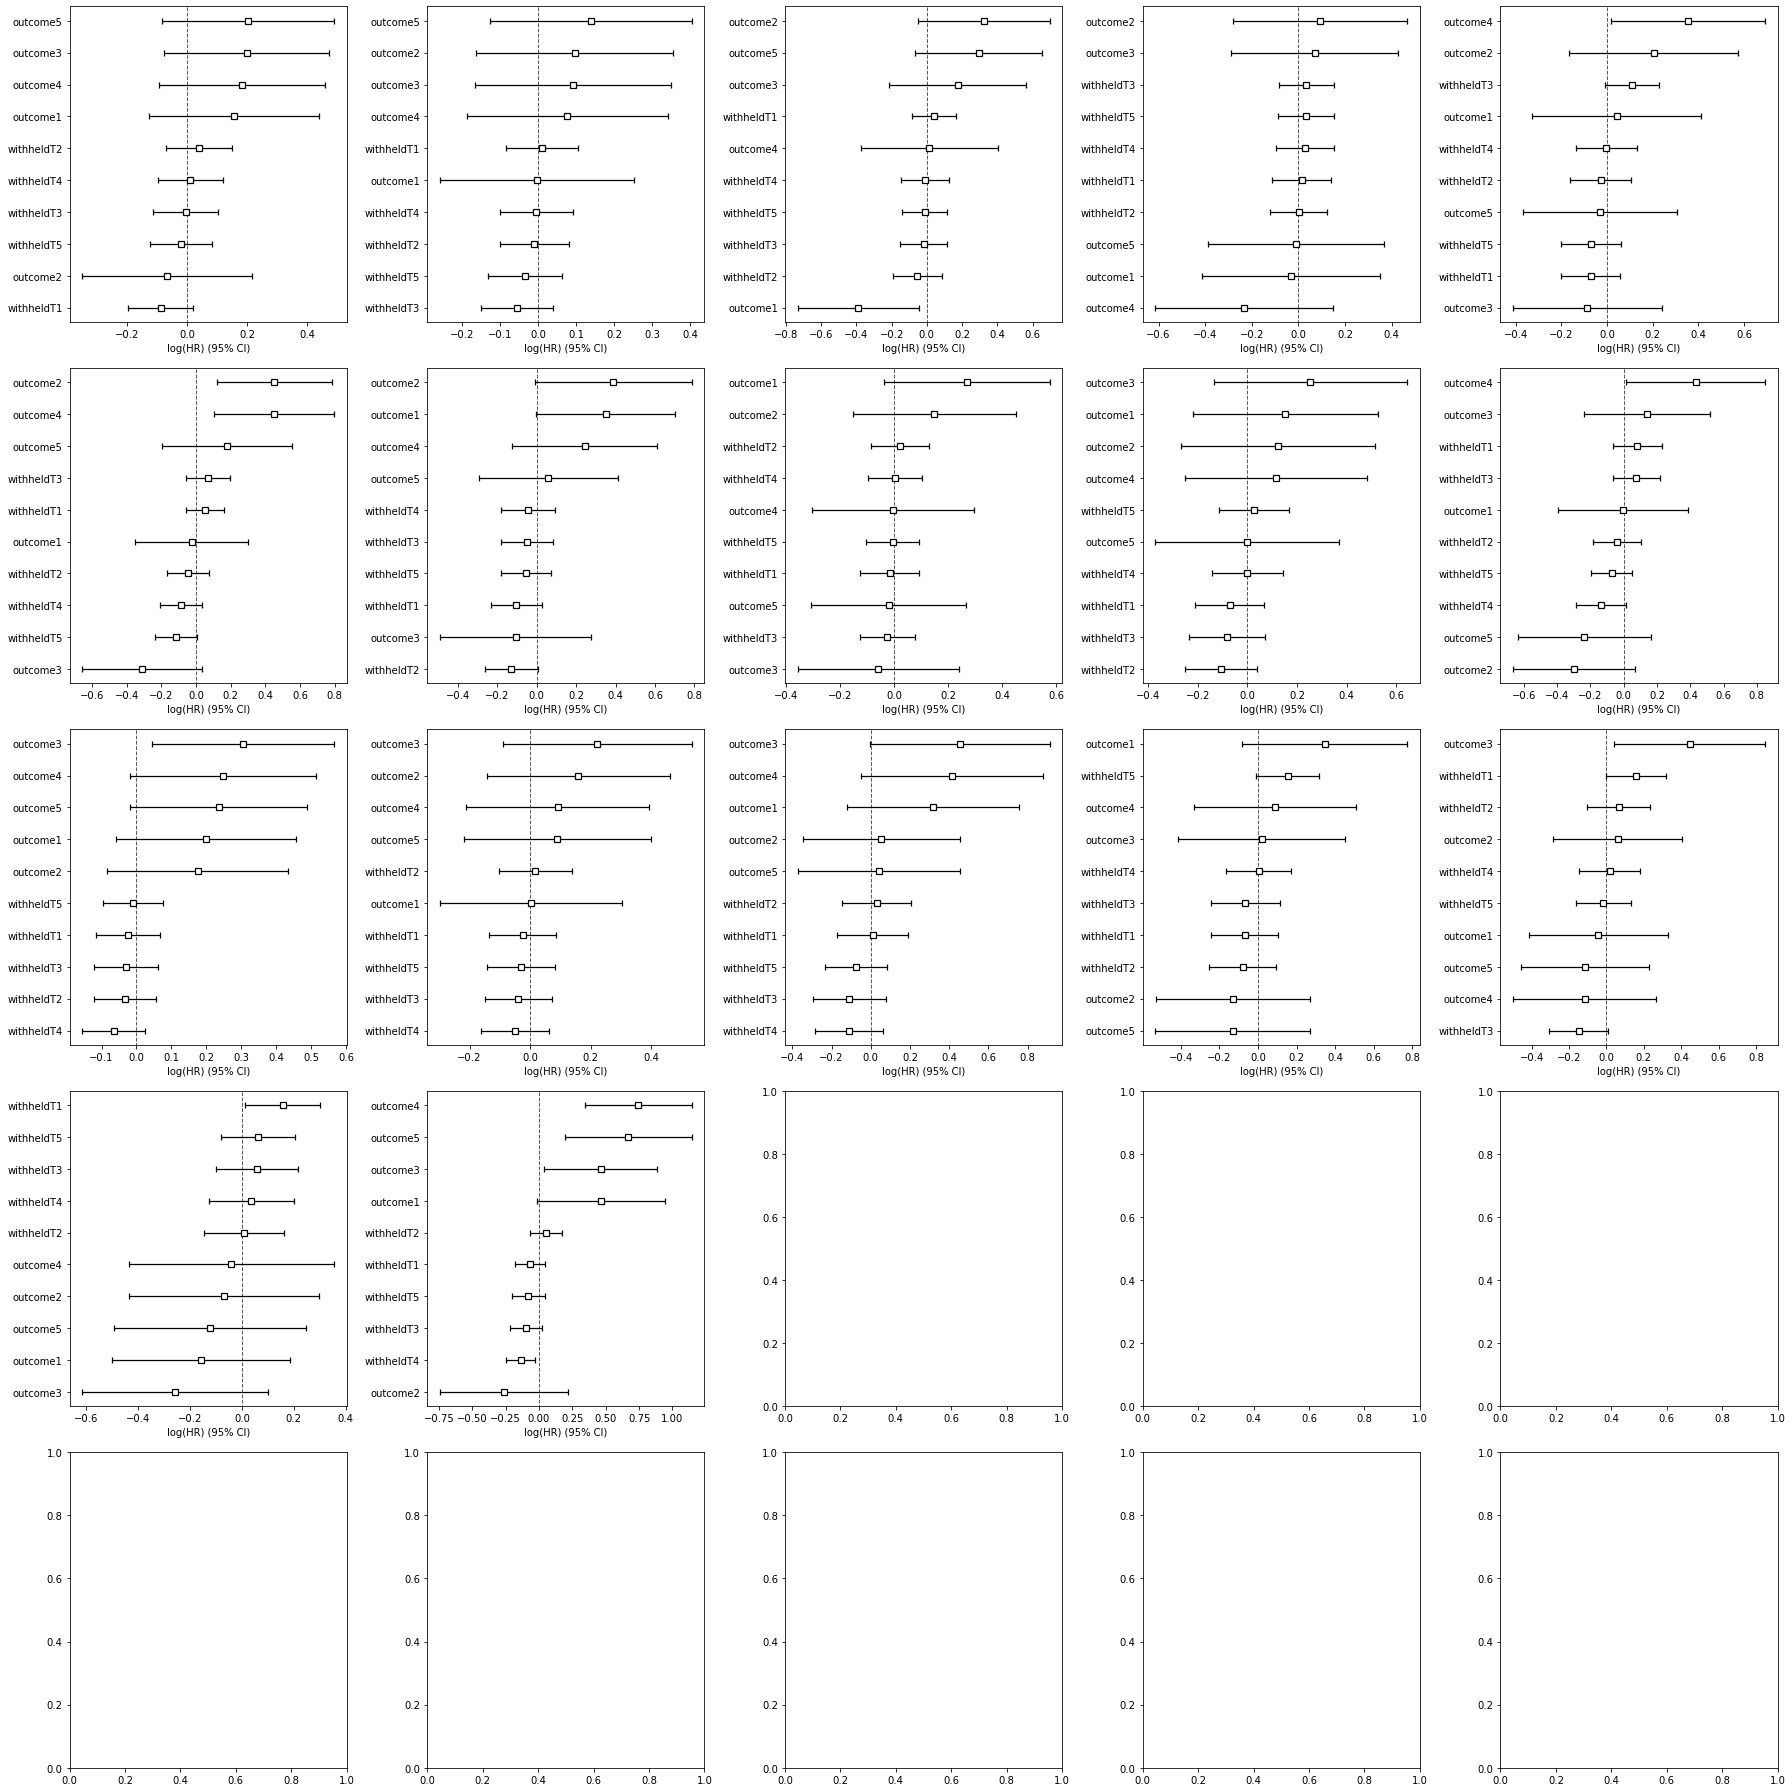

In [118]:
# Function to perform Cox regression and plot the results
def perform_cox_regression(file_path, ax):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Fit the Cox proportional hazards model
    cph = CoxPHFitter()
    cph.fit(df, duration_col='withheldT', event_col='censorFlag', formula="outcome1 + outcome2 + outcome3 + outcome4 + outcome5 + withheldT1 + withheldT2 + withheldT3 + withheldT4 + withheldT5")
    
    # Plot the summary on the provided axis
    cph.plot(ax=ax)

# Directory containing the CSV files
directory = r'M:\My Drive\Response Inhibition Project\2021-22_Attention\NP 2024-7\cox hazard cov'
all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
all_files.sort()

# Choose the animal to process
animal = 'N1'

# Get the indices for the chosen animal
file_indices = animal_dict[animal]

# Create a list of file paths based on indices
file_paths = [os.path.join(directory, all_files[index]) for index in file_indices]

# Create subplots
fig, axs = plt.subplots(5, 5, figsize=(25, 25))

# Ensure axs is iterable even if there's only one subplot
axs = axs.flatten()

# Iterate through each file and perform Cox regression
for ax, file_path in zip(axs, file_paths):
    perform_cox_regression(file_path, ax)

# Adjust layout
plt.tight_layout()

# Save the combined plot
plt.savefig(r'M:\My Drive\Response Inhibition Project\2021-22_Attention\NP 2024-7\cox python results' + f'\{animal}_cox_regression_results.png')

# Show the plot
plt.show()
